# Challenge 1
Design a quantum circuit that acts as a biased coin. For example: 60% of the time Heads (or 0) shows up and 40% Tails (or 1). You can set any bias you like, just make sure it is not equal. You can assume any missing information.

### Understanding the problem
Let Heads be state of 0

Let Tails be state of 1

We know that a fair coin has equal probability of being H or T, that is the P(H) = 0.5 and P(T)=0.5, where P(H) is probability of getting heads and P(T) is the probability of getting tails.

Now a baised coin is a coin where the chances of getting H and T is not same, that is P(H) != P(T) != 0.5

This implies that a biased coin can be anything other than equal superposition

So there is no fixed solution for this problem and depends on your creativity.
1. You can create a circuit by implementing Rx(45) and you will get a baised coin. 
2. You can use a T gate or S gate or any combination of gates, just make sure that on a block sphere the final solution should not be parallel to XY plane. 
3. Taking a qubit and letting it be so is also correct but an extreme answer as you will get Heads 100% of the time.

#### Implementing the Rx(45) approach as a demo

We know Rx($\theta$) gate in matrix form is as shown below:
$$Rx(\theta) =\begin{bmatrix} cos(\frac{\theta}{2}) & -isin(\frac{\theta}{2})   \\ -isin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}$$
<br/>

So, Rx($\pi/4$) will be:
$$Rx(\pi/4) =\begin{bmatrix} cos(\frac{\pi/4}{2}) & -isin(\frac{\pi/4}{2})   \\ -isin(\frac{\pi/4}{2}) & cos(\frac{\pi/4}{2}) \end{bmatrix}$$
<br/>

Which equals to:
$$Rx(\pi/4) =\begin{bmatrix} 0.9239 & -i0.3827   \\ -i0.3827 & 0.9239 \end{bmatrix}$$
<br/>
$$\newcommand{\ket}[1]{|#1\rangle}$$
We know that a newly intialised qubit in qiskit is $\ket{0}$

So the final state of the output will be $Rx(\pi/4) * \ket{0}$


$Rx(\pi/4) * \ket{0}$ = 
$$\begin{bmatrix} 0.9239 & -i0.3827   \\ -i0.3827 & 0.9239 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0.9239 \\ -i0.3827 \end{bmatrix}$$

So Probability of H or 0 will be $0.9239^{2}$ = 0.85359121

and Probability of T or 1 will be $-i0.3827^{2}$ = 0.14645929

#### So we have created a biased coin which gets heads 85% of the time and tails 15% of the time

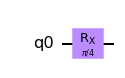

In [1]:
# Rx gate in quantum where theta=pi/4
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, visualization
from math import pi

q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.rx(pi/4, q)
display(qc.draw(output="mpl"))

In [2]:
# executing the circuit
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

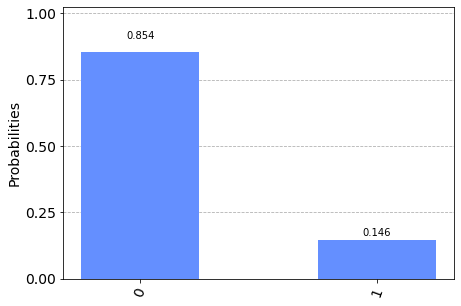

In [3]:
# plot the probability histogram
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

The histogram verifies the probabilites calculated above. 

We have successfully created a biased coin where P(H) = 0.85 and P(T)=0.15

This is just an example, any other solution holds correct as well till the time P(H)!=P(T)!=0.50

Have a look over [here](https://github.com/developer-student-club-thapar/Quantum-Computing/tree/main/3.%20Single%20Qubit%20Gates), to understand other gates you can use to achieve unequal superposition

# Challenge 2: 
Take a qubit and put it in state of 1. Now create an equal superposition and present the measured result as a histogram. Explain the result obtained.

### Understanding the solution
1. In qiskit, qubits are intialised as $\ket{0}$
2. To transform $\ket{0}$ to $\ket{1}$ use X gate
3. Now, to achieve equal superposition use H gate (That is P($\ket{0}$)=0.50 and P($\ket{1}$)=0.50
4. Plot the histogram

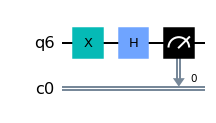

In [4]:
# X gate -> H gate -> measure
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q)
qc.h(q)
qc.measure(q,c)
display(qc.draw(output="mpl"))

In [5]:
# executing the circuit
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

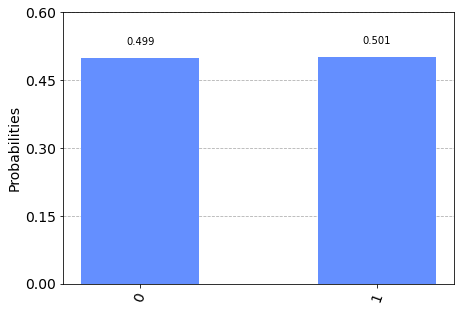

In [6]:
# plot the probability histogram
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

# Challenge 3:
Take 2 qubits and entangle them in as many ways you can think of. Plot a histogram of the results and explain the results. (Hint: maximum ways of entangling 2 qubits is 4)

### Understanding the approach:

### Entanglement
$$\newcommand{\ket}[1]{|#1\rangle}$$
So you have 2 qubits and you know measuring them one by one will give you either $\ket{0}$ or $\ket{1}$.

But if they were entangled it would mean that if you measure one of them, then the information you gain from the result would let you know the state in which the other qubit collapses on measurement, before measuring it. 

So the second qubit is still in superposition but you already know the well-defined state it will collapse in.

### Bell States
Maximally entangled states on 2 qubits. There are 4 bell states and quantum circuits for the same are expected as a solution. 
#### 1. $\ket{q} = \frac{\ket{00} + \ket{11}}{\sqrt{2}}$ ( a in figure below)
If we were to measure the first qubit to be $\ket{0}$ then even without measuring we know that the second qubit will be $\ket{0}$ upon measuring and vice-versa.

If we were to measure the first qubit to be $\ket{1}$ then even without measuring we know that the second qubit will be $\ket{1}$ upon measuring and vice-versa.

You can imagine tossing 2 coins, and one of them stops to be in a particular state, then the second coin which is still tossing, will give a predetermined result on measurement(stopping).

Another analogy would be that time when you and your entangled brother were given a choice between 2 things, we know what you chose and from this information we already have the information regarding what your brother will choose, after all he is a copycat, just like the given bell state.

#### 2. $\ket{q} = \frac{\ket{00} - \ket{11}}{\sqrt{2}}$ ( c in figure below)
If we were to measure the first qubit to be $\ket{0}$ then even without measuring we know that the second qubit will be $\ket{0}$ upon measuring and vice-versa.

If we were to measure the first qubit to be $\ket{1}$ then even without measuring we know that the second qubit will be $\ket{1}$ upon measuring and vice-versa.

#### 3. $\ket{q} = \frac{\ket{01} + \ket{10}}{\sqrt{2}}$ ( b in figure below)
If we were to measure one qubit to be $\ket{0}$ then even without measuring we know that the other qubit will be $\ket{1}$ upon measuring and vice-versa.

If we were to measure one qubit to be $\ket{1}$ then even without measuring we know that the other qubit will be $\ket{0}$ upon measuring and vice-versa.

Now your brother doesn't want the same thing as you, but the opposite one, now that he has all grown up and avoids you at school.

#### 4. $\ket{q} = \frac{\ket{01} - \ket{10}}{\sqrt{2}}$ ( d in figure below)
If we were to measure one qubit to be $\ket{0}$ then even without measuring we know that the other qubit will be $\ket{1}$ upon measuring and vice-versa.

If we were to measure one qubit to be $\ket{1}$ then even without measuring we know that the other qubit will be $\ket{0}$ upon measuring and vice-versa.


![b](https://media.springernature.com/lw685/springer-static/image/art%3A10.1134%2FS1547477119060153/MediaObjects/11497_2019_9131_Fig6_HTML.gif)

#### 1. $\ket{q} = \frac{\ket{00} + \ket{11}}{\sqrt{2}}$ 

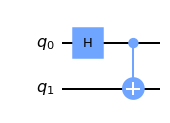

In [7]:
# define the quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

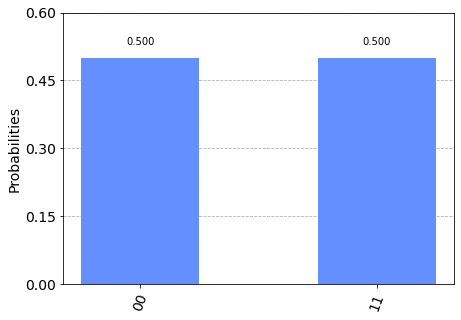

In [8]:
# execute the circuit and plot the probability histogram
job = execute(qc, backend)
result = job.result()
visualization.plot_histogram(result.get_counts())

#### 2. $\ket{q} = \frac{\ket{00} - \ket{11}}{\sqrt{2}}$

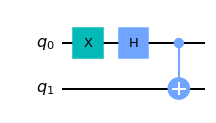

In [9]:
# define the quantum circuit
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

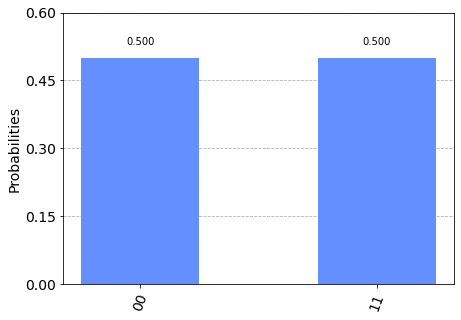

In [10]:
# execute the circuit and plot the probability histogram
job = execute(qc, backend)
result = job.result()
visualization.plot_histogram(result.get_counts())

#### 3. $\ket{q} = \frac{\ket{01} + \ket{10}}{\sqrt{2}}$

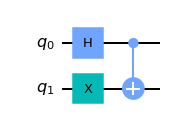

In [11]:
# define the quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.draw('mpl')

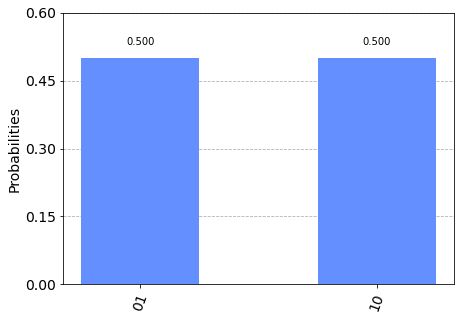

In [12]:
# execute the circuit and plot the probability histogram
job = execute(qc, backend)
result = job.result()
visualization.plot_histogram(result.get_counts())

#### 4. $\ket{q} = \frac{\ket{01} - \ket{10}}{\sqrt{2}}$

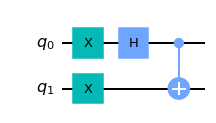

In [13]:
# define the circuit
qc = QuantumCircuit(2)
qc.x([0,1])
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

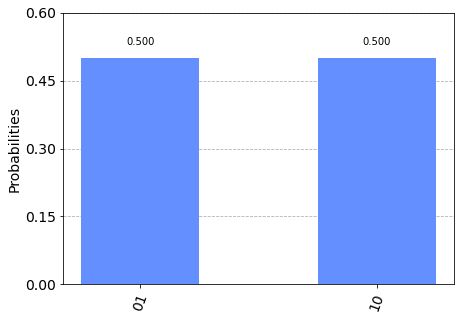

In [14]:
# execute the circuit and plot the probability histogram
job = execute(qc, backend)
result = job.result()
visualization.plot_histogram(result.get_counts())

For more details on entanglement and bell states go [here](https://github.com/developer-student-club-thapar/Quantum-Computing/blob/main/4.%20Multi-Qubit%20Gates/c.%20Bell%20States.ipynb)

### Thankyou for being a part of Qiskit Fall Fest 2022: Fundamentals of Quantum computing (Thapar University)

We hope that you enjoyed thoroughly and learned a new cutting edge skill!